## <center> Correction à partir des mesures capillaire vide , capillaire+hexane, intensité calculée SLD hexane</center>

On tavaille sur le fichier 

In [99]:
#%matplotlib widget
import pandas as pd
import calib_tools as ct
import os
import matplotlib.pyplot as plt
import numpy as np

- Charger le fichier récapitualtif des sample names pour isoler:
    - references
    - cellules vides
    - samples

In [2]:
sample_folder = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
sample_file = '_samples_ref.csv'
maskfile = 'macro_mask/mask_waxs_eiger_ruiz_oct24.edf'

samples_df = pd.read_csv(os.path.join(sample_folder,sample_file))

In [3]:
# Filter the DataFrame for sample names that start with 'E'
sample_names_starting_with_E = samples_df[samples_df['Sample name'].str.startswith('E')]
sample_names_starting_with_R = samples_df[samples_df['Sample name'].str.startswith('R')]
sample_names_starting_with_S = samples_df[samples_df['Sample name'].str.startswith('S')]
# Get the list of sample names
empty_names_list = sample_names_starting_with_E['Sample name'].tolist()
ref_names_list = sample_names_starting_with_R['Sample name'].tolist()
sample_names_list = sample_names_starting_with_S['Sample name'].tolist()



# Display the list of sample names
print(empty_names_list)
print(ref_names_list)
print(sample_names_list)

['E_C_1_P_1', 'E_C_1_P_2', 'E_C_1_P_3', 'E_C_1_P_4', 'E_C_1_P_5', 'E_C_1_P_6', 'E_C_1_P_7', 'E_C_1_P_8', 'E_C_1_P_9', 'E_C_1_P_10', 'E_C_1_P_11', 'E_C_1_P_12', 'E_C_1_P_13', 'E_C_1_P_14', 'E_C_1_P_15', 'E_C_1_P_16', 'E_C_1_P_17', 'E_C_1_P_18', 'E_C_1_P_19', 'E_C_1_P_20', 'E_C_1_P_21', 'E_C_1_P_22', 'E_C_1_P_23', 'E_C_1_P_24', 'E_C_1_P_25', 'E_C_1_P_26', 'E_C_1_P_27', 'E_C_1_P_28', 'E_C_1_P_29', 'E_C_1_P_30', 'E_C_1_P_31', 'E_C_1_P_32', 'E_C_1_P_33', 'E_C_1_P_34', 'E_C_1_P_35', 'E_C_1_P_36', 'E_C_1_P_37', 'E_C_1_P_38', 'E_C_1_P_39', 'E_C_1_P_40', 'E_C_2_P_1', 'E_C_2_P_2', 'E_C_2_P_3', 'E_C_2_P_4', 'E_C_2_P_5', 'E_C_2_P_6', 'E_C_2_P_7', 'E_C_2_P_8', 'E_C_2_P_9', 'E_C_2_P_10', 'E_C_2_P_11', 'E_C_2_P_12', 'E_C_2_P_13', 'E_C_2_P_14', 'E_C_2_P_15', 'E_C_2_P_16', 'E_C_2_P_17', 'E_C_2_P_18', 'E_C_2_P_19', 'E_C_2_P_20', 'E_C_2_P_21', 'E_C_2_P_22', 'E_C_2_P_23', 'E_C_2_P_24', 'E_C_2_P_25', 'E_C_2_P_26', 'E_C_2_P_27', 'E_C_2_P_28', 'E_C_2_P_29', 'E_C_2_P_30', 'E_C_2_P_31', 'E_C_2_P_32', 'E_C_2_P_

In [4]:

# Filter the DataFrame for sample names that start with 'E'
filtered_df = samples_df[samples_df['Sample name'].str.startswith('E')]
file_names_starting_with_E = filtered_df['File'].tolist()

# Filter the DataFrame for sample names that start with 'R'
filtered_df = samples_df[samples_df['Sample name'].str.startswith('R')]
file_names_starting_with_R = filtered_df['File'].tolist()

# Filter the DataFrame for sample names that start with 'S'
filtered_df = samples_df[samples_df['Sample name'].str.startswith('S')]
file_names_starting_with_S = filtered_df['File'].tolist()



- Regarder la dispersion des résultats pour la cellule vide et la cellules contenant l'hexane (les samples varient, bien sûr)

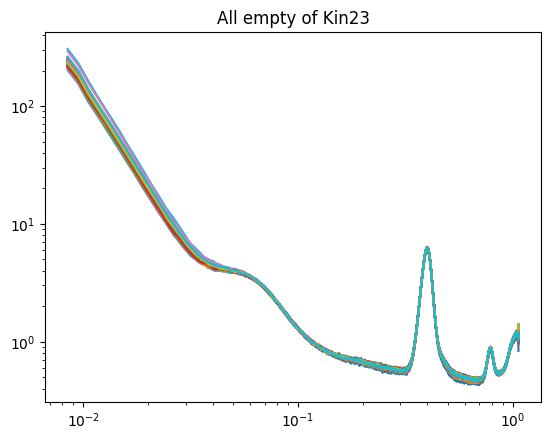

In [5]:
fig,ax = plt.subplots()
for file in file_names_starting_with_E:
    file = os.path.join(sample_folder,file)
    params_E = ct.extract_from_h5(file)
    q_empty, i_empty = ct.integrate(params_E,maskfile,mean=True)
    
    ax.loglog(q_empty, i_empty)
    ax.set_title('All empty of Kin23')

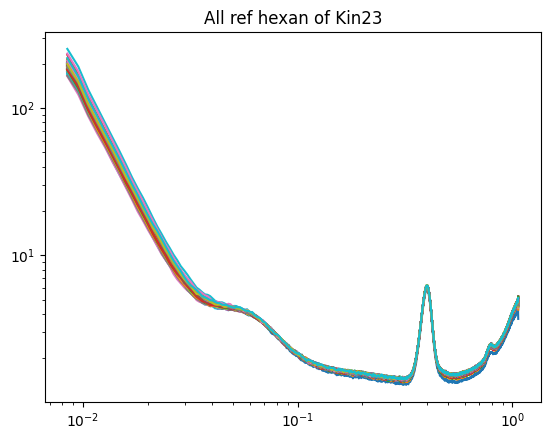

In [6]:
fig,ax = plt.subplots()
for file in file_names_starting_with_R:
    file = os.path.join(sample_folder,file)
    params_R = ct.extract_from_h5(file)
    q_empty, i_empty = ct.integrate(params_R,maskfile,mean=True)
    
    ax.loglog(q_empty, i_empty)
    ax.set_title('All ref hexan of Kin23')

In [7]:
def view_plots(file_list,type):
    all_i = []
    all_mi8 = []
    all_exp_time = []
    all_i_corr = []
    fig,ax = plt.subplots()
    for file in file_list:
        if file.endswith('.h5'):  
            file_path =  os.path.join(sample_folder,file)
            params = ct.extract_from_h5(file_path, False)
            q, i = ct.integrate(params,maskfile,mean=True)
            all_i.append(i)
            ax.loglog(q, i)

            mi8 = np.mean(params['averagemi8b'])
            exp_time = params['exposure_time']
            all_mi8.append(mi8)
            all_exp_time.append(exp_time)
            

            i_corr = i/(mi8*exp_time*30700)
            all_i_corr.append(i_corr)

    mean_i = np.mean(np.array(all_i),axis=0)
    mean_i_corr = np.mean(np.array(all_i_corr),axis=0)

    
    ax.loglog(q, mean_i, label='Mean i_'+type, color='red', linestyle=':',linewidth=3)
    ax.loglog(q, mean_i_corr, label='Mean i_corr_'+type, color='blue', linestyle=':',linewidth=3)
    ax.legend()

    return q, mean_i_corr

- La dispersion des résultats semble faible pour pour les cellules vides et pour les cellules contenant l'hexane. On calcule donc:
    - les moyennes (pointillés rouges)
    - les courbes corrigées avec la valeur de la diode mi8 et exposure time

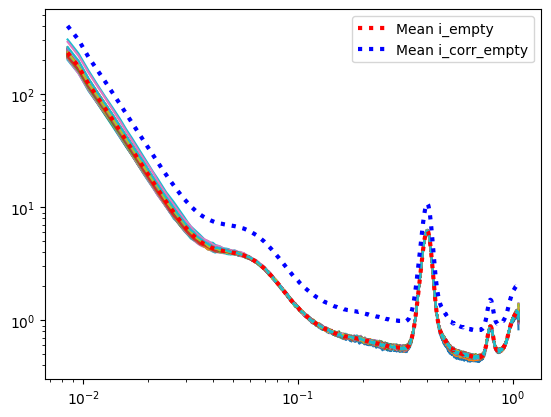

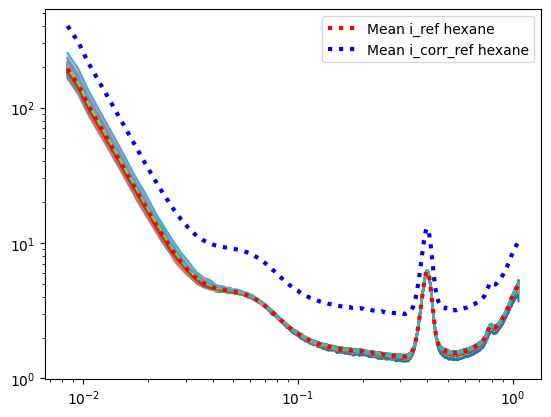

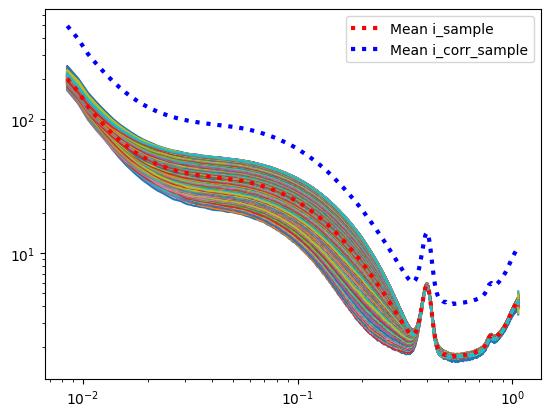

In [8]:
q, mean_i_corr_E = view_plots(file_names_starting_with_E, 'empty')
q, mean_i_corr_R = view_plots(file_names_starting_with_R, 'ref hexane')
q, mean_i_corr_S = view_plots(file_names_starting_with_S, 'sample')


- On soustrait la mesure des cellules vides aux mesures des cellules contenant l'hexane pour obtenir le "plateau" de l'hexane

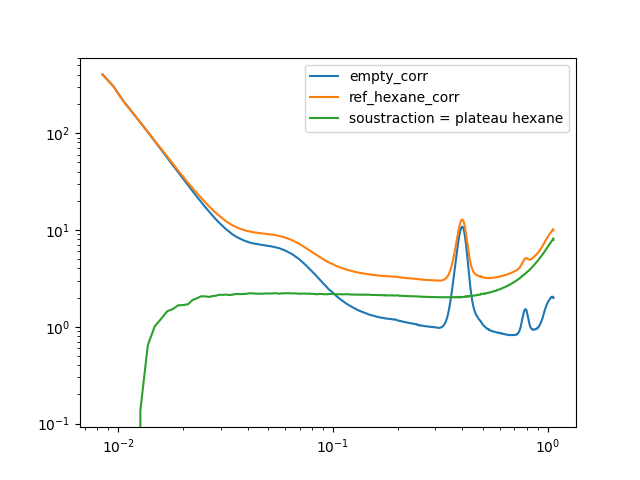

In [9]:
%matplotlib widget
plateau_hexane = mean_i_corr_R - mean_i_corr_E

fig,ax = plt.subplots()
ax.plot(q,mean_i_corr_E, label = 'empty_corr')
ax.loglog(q,mean_i_corr_R, label = 'ref_hexane_corr')
ax.loglog(q,plateau_hexane, label='soustraction = plateau hexane')
ax.legend()


visuellement : le plateau est obtenu pour 0.03<q<0.34
- moyenne des valeurs d'intensité sur le plateau en pointillés gris
- Intensité calculée par sebastien I0 = 2.93


mean_plateau =  2.1078746


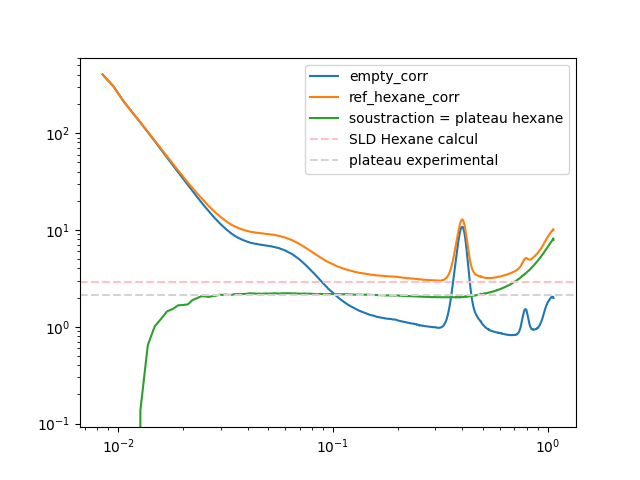

In [92]:
mask = (q > 0.03) & (q < 0.34)
mean_plateau = np.mean(plateau_hexane[mask])
print('mean_plateau = ',mean_plateau)
SLD_hexane = 2.93#6.3e-3 #Cf excel Sébastien
fig,ax = plt.subplots()
ax.plot(q,mean_i_corr_E, label = 'empty_corr')
ax.loglog(q,mean_i_corr_R, label = 'ref_hexane_corr')
ax.loglog(q,plateau_hexane, label='soustraction = plateau hexane')
ax.axhline(y=SLD_hexane, color='pink', linestyle='--',label = 'SLD Hexane calcul')
ax.axhline(y=mean_plateau, color='lightgrey', linestyle='--',label = 'plateau experimental')
ax.legend()

- calcul du coef pour faire correspondre le plateau théorique à la valeur I0 attendue

In [104]:
coef = SLD_hexane/mean_plateau

print(coef)

1.3900257423679745


- Vérification en comparant à une manip foxtrot validée par Guillaume:

Test du coef sur kin23 fin de réaction

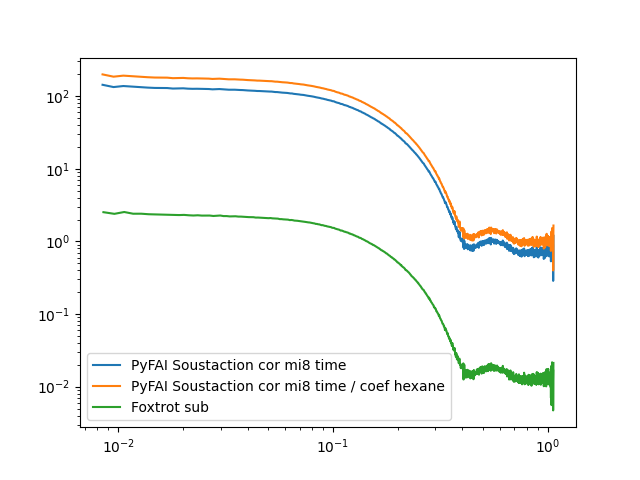

In [108]:
sample_folder = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
sample_file = 'rodriguez_05764_2024-10-12_16-33-19.h5'
ref_file ='rodriguez_05533_2024-10-12_15-40-12.h5'

        
file_path =  os.path.join(sample_folder,sample_file)
params = ct.extract_from_h5(file_path, False)
q, i = ct.integrate(params,maskfile,mean=True)
mi8 = np.mean(params['averagemi8b'])
exp_time = params['exposure_time']
i_corr = i/(mi8*exp_time*30700)


file_path =  os.path.join(sample_folder,ref_file)
params = ct.extract_from_h5(file_path, False)
q, i = ct.integrate(params,maskfile,mean=True)
mi8 = np.mean(params['averagemi8b'])
exp_time = params['exposure_time']
i_corr_ref = i/(mi8*exp_time*30700)

i_sub = i_corr - i_corr_ref

foxtrot_path = 'fin_cinetique/S_C_2_SF_3_P_5_05764{0,0}_AzInt_Px_463.dat'
foxtrot_sub = ct.load_foxtrot(foxtrot_path)

fig,ax = plt.subplots()
# ax.loglog(q, i,label = 'PyFAI sample raw')
# ax.loglog(q, i_corr,label = 'PyFAI sample cor mi8 time')
# ax.loglog(q, i_corr_ref,label = 'PyFAI ref cor mi8 time')
ax.loglog(q, i_sub,label = 'PyFAI Soustaction cor mi8 time')
ax.loglog(q, i_sub*coef,label = 'PyFAI Soustaction cor mi8 time / coef hexane')
ax.loglog(foxtrot_sub[0],foxtrot_sub[1], label = 'Foxtrot sub')

ax.legend()


### CCL: On ne retrouve pas du tout la courbe foxtrot!!!

In [86]:
mean_ratio , sigma_ratio = ct.ratio(foxtrot_sub[0],foxtrot_sub[1],q,i_sub)

ratio= 55.361, sigma= 1.803


- Test sur la deuxieme courbe validée par Guillaume:

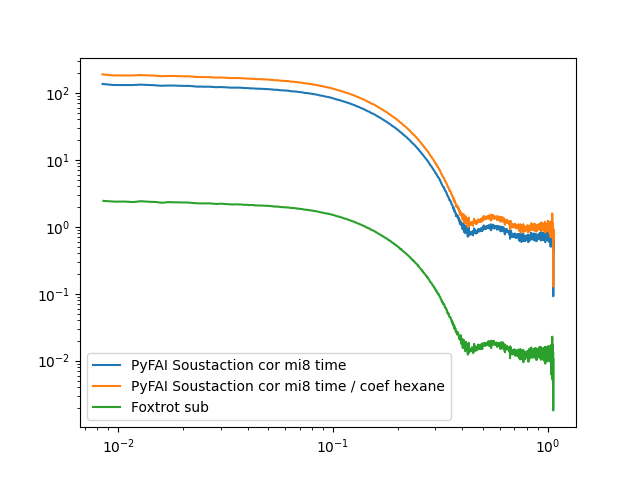

In [ ]:
sample_folder = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
sample_file = 'rodriguez_05734_2024-10-12_16-28-20.h5'
ref_file ='rodriguez_05563_2024-10-12_15-45-12.h5'


        
file_path =  os.path.join(sample_folder,sample_file)
params = ct.extract_from_h5(file_path, False)
q, i = ct.integrate(params,maskfile,mean=True)
mi8 = np.mean(params['averagemi8b'])
exp_time = params['exposure_time']
i_corr = i/(mi8*exp_time*30700)


file_path =  os.path.join(sample_folder,ref_file)
params = ct.extract_from_h5(file_path, False)
q, i = ct.integrate(params,maskfile,mean=True)
mi8 = np.mean(params['averagemi8b'])
exp_time = params['exposure_time']
i_corr_ref = i/(mi8*exp_time*30700)

i_sub = i_corr - i_corr_ref

foxtrot_path = 'fin_cinetique/S_C_2_SF_3_P_35_05734{0,0}_AzInt_Px_427.dat'
foxtrot_sub = ct.load_foxtrot(foxtrot_path)

fig,ax = plt.subplots()
# ax.loglog(q, i,label = 'PyFAI sample raw')
# ax.loglog(q, i_corr,label = 'PyFAI sample cor mi8 time')
# ax.loglog(q, i_corr_ref,label = 'PyFAI ref cor mi8 time')
ax.loglog(q, i_sub,label = 'PyFAI Soustaction cor mi8 time')
ax.loglog(q, i_sub*coef,label = 'PyFAI Soustaction cor mi8 time / coef hexane')
ax.loglog(foxtrot_sub[0],foxtrot_sub[1], label = 'Foxtrot sub')

ax.legend()

### CCL: On ne retrouve toujours pas du tout la courbe foxtrot!!!